In [1]:
from data_generation.gen_data import *
from model.utils import *

import seaborn as sns
import numpy as np

  0%|          | 0/12 [00:00<?, ?it/s]

Generating logistic distribution, 30 days, 1000 samples...


100%|██████████| 29/29 [00:06<00:00,  4.55it/s]


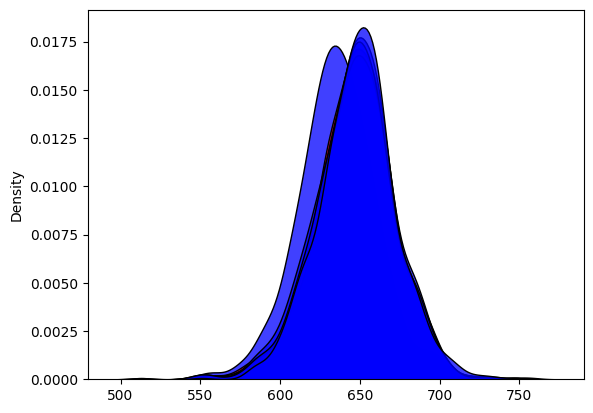

  0%|          | 0/12 [00:06<?, ?it/s]

[[558 656 658 ... 663 635   0]
 [710 611 630 ... 640 656   1]
 [621 610 635 ... 649 658   0]
 [598 657 640 ... 614 640   0]
 [680 684 643 ... 658 641   0]]


In [4]:
num_days = [30, 60]
num_samples = [1000, 3000]
ratios = [0.7, 0.8, 0.9]
dist = "logistic"
mode = "plain"

num_days_num_samples_ratios = [(num_day, num_sample, ratio) for num_day in num_days for num_sample in num_samples for ratio in ratios]

for num_day, num_sample, ratio in tqdm(num_days_num_samples_ratios):
    data = generate_data(num_day, num_sample, dist=dist, mode=mode, normal_ratio=ratio, visualize=True)
    # with open(f"../data/test/{mode}/{dist}_{num_day}_days_{num_sample}_samples.npy", "wb") as f:
    #     np.save(f, data)
    break

In [4]:
num_day = 365
num_sample = 100000
dist = "logistic"
mode = "plain"

data_path = f"../data/train/{mode}/{dist}_{num_day}_days_{num_sample}_samples.npy"
data = np.load(data_path)
data.shape

(365, 100001)

In [3]:
X, y = data[:, :-1], data[:, -1]
print(X.shape)
print(y.shape)

(30, 1000)
(30,)


In [68]:
min_edge, max_edge = 300, 850
bin_edges = np.arange(min_edge, max_edge + 1, 1)

new_data = []
for i in range(num_day):
    new_data.append(np.array(np.histogram(X[i], bins=bin_edges)[0].tolist() + [y[i]]))
new_data = np.array(new_data)
new_data.shape

(365, 551)

In [69]:
with open(f"../data/train/histogram/{dist}_{num_day}_days_{num_sample}_samples.npy", "wb") as f:
    np.save(f, new_data)

In [9]:
index_0 = np.where(y == 0)[0]
index_0

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 28])

In [5]:
index_1 = np.where(y == 1)[0]
index_1

array([13, 20, 27, 29])

0 0
0.000418604197209586 True
0.0926338566727371 False
0.0371912797559238 False
0.09320521919784434 False
0.18208938585800222 True 

1 0
3.528972349889754e-06 True
0.09155034503881904 False
0.047766775537638875 False
0.08531012768467469 False
0.18758998392640538 True 

2 0
0.34112475112661245 False
0.037692025476695916 False
0.0055853574215378446 False
0.011390967516487225 False
0.09307605836412182 False 

3 0
0.19957365535779528 False
0.06727047130252166 False
0.02716390589875808 False
0.04464937834104088 False
0.0913785872974204 False 

4 0
0.6854967337920594 False
0.04168746486469978 False
0.006104178212374626 False
0.022236262829511307 False
0.08079559052310273 False 

5 0
0.04839715079181246 True
0.06766344420756423 False
0.016713038208785547 False
0.04146771066135915 False
0.1618018446709006 True 

6 0
0.28779764348473313 False
0.0427372883278586 False
0.007015152938640499 False
0.014727510125634986 False
0.09093409149512158 False 

7 0
0.19957365535779528 False
0.053229363577534

/tmp/ipykernel_178260/1038284514.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 7))


21 0
0.647814872077161 False
0.025069363318736142 False
0.002512620413116072 False
0.005033130871552765 False
0.06042621469193684 False 

22 0
0.37012017606173 False
0.03909114221059816 False
0.005841514118141374 False
0.012334126610883464 False
0.07959822626641698 False 

23 0
0.28779764348473313 False
0.03651641955868965 False
0.005304182896179857 False
0.010689194745031983 False
0.09365438051872742 False 

24 0
9.23442040824848e-11 True
0.1297100398684543 True
0.07754514513933078 False
0.1458801583898355 True
0.2511544037736137 True 

25 0
6.754654990327923e-20 True
0.1723664348333356 True
0.12483254000943371 True
0.24360420351940784 True
0.4386198760241535 True 



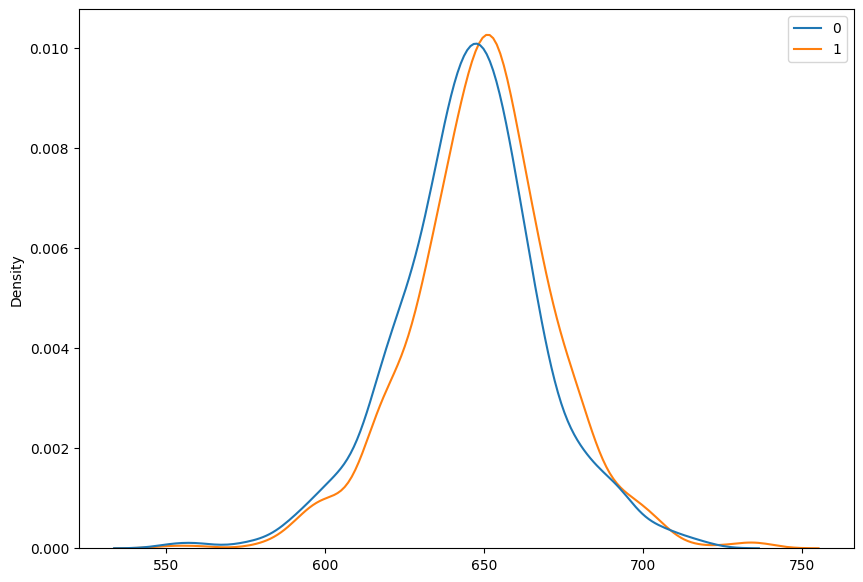

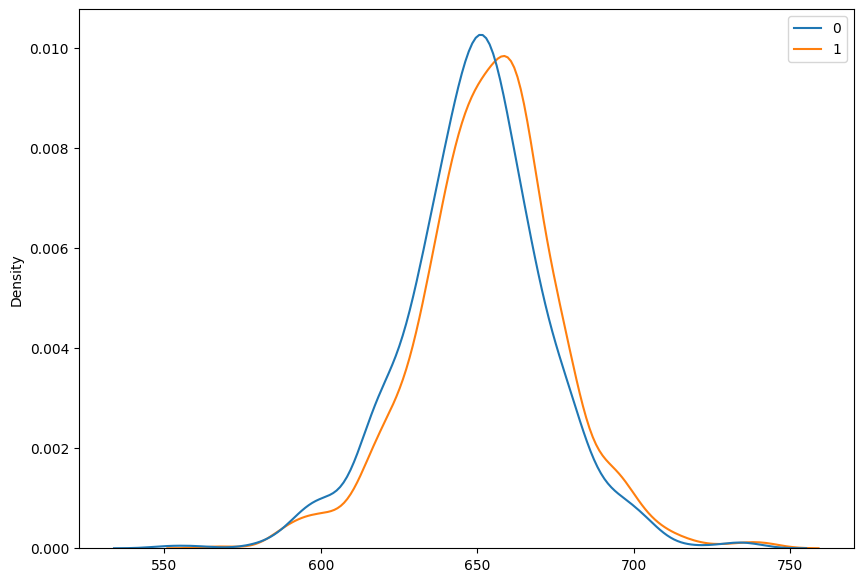

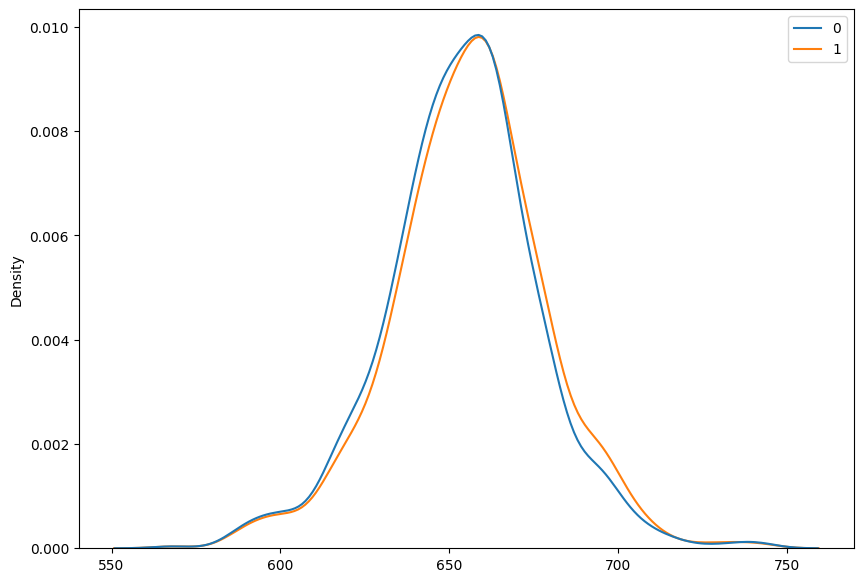

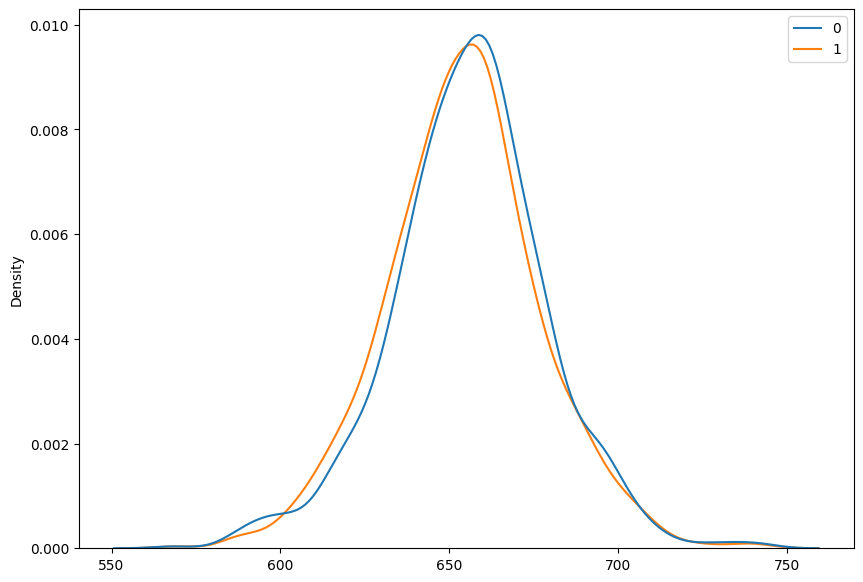

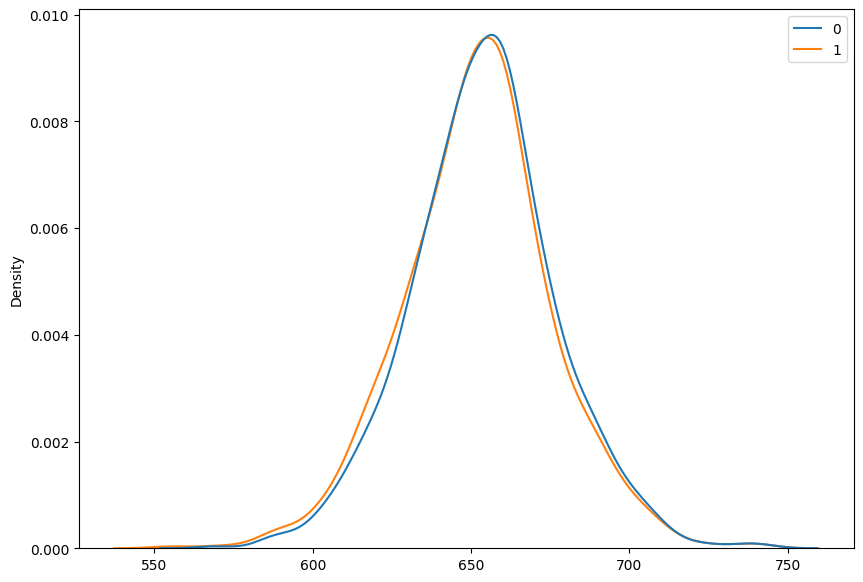

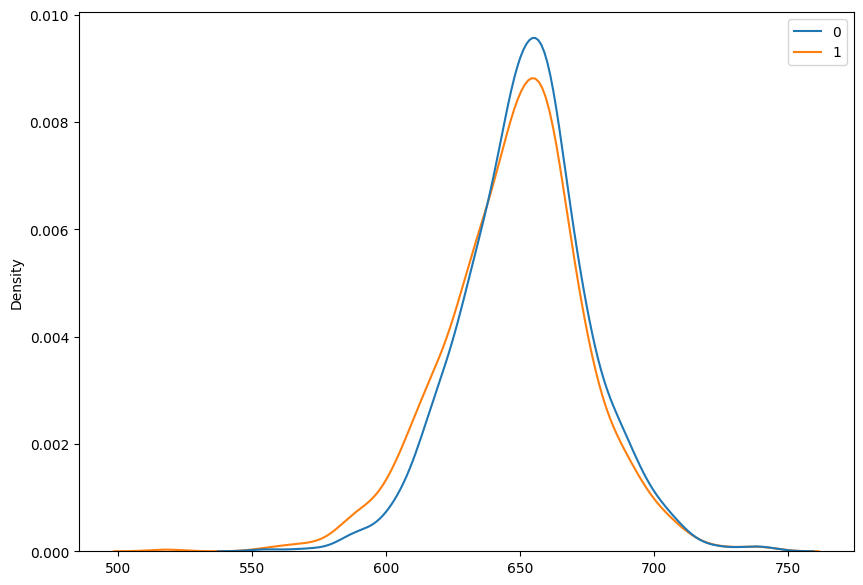

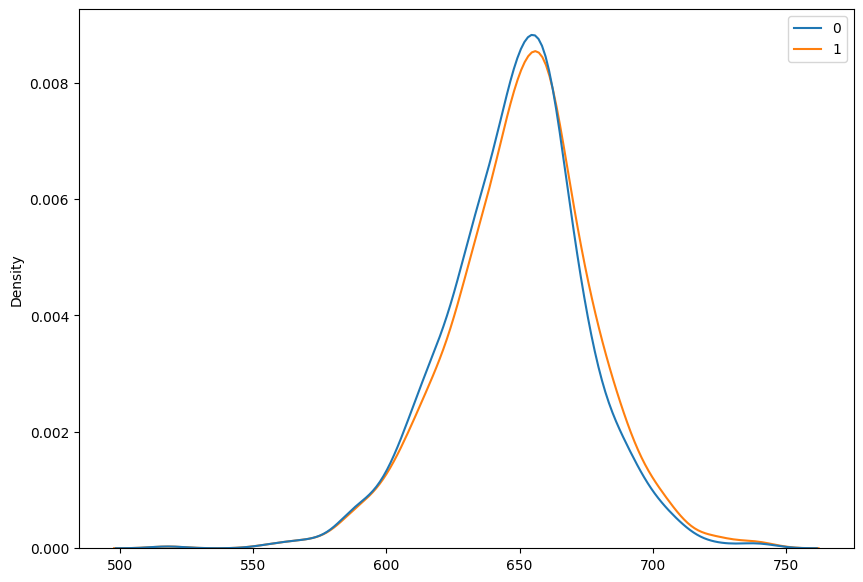

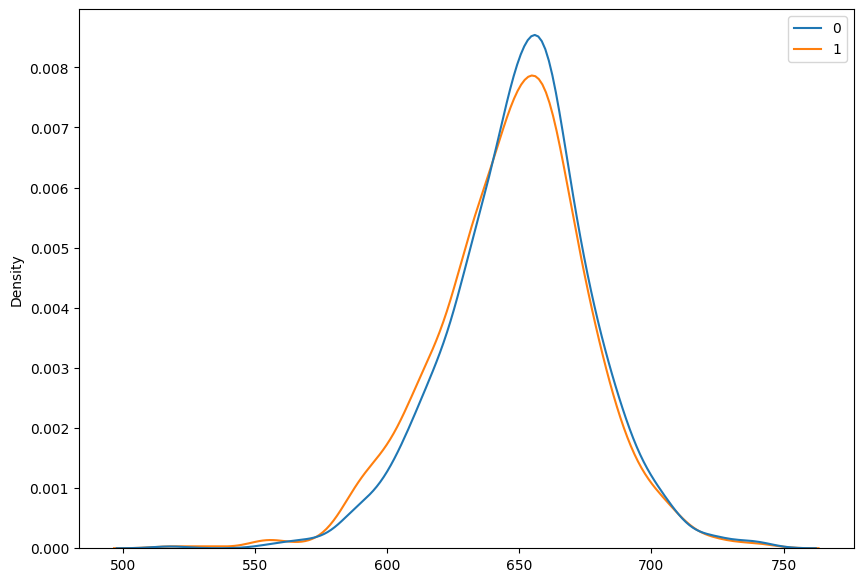

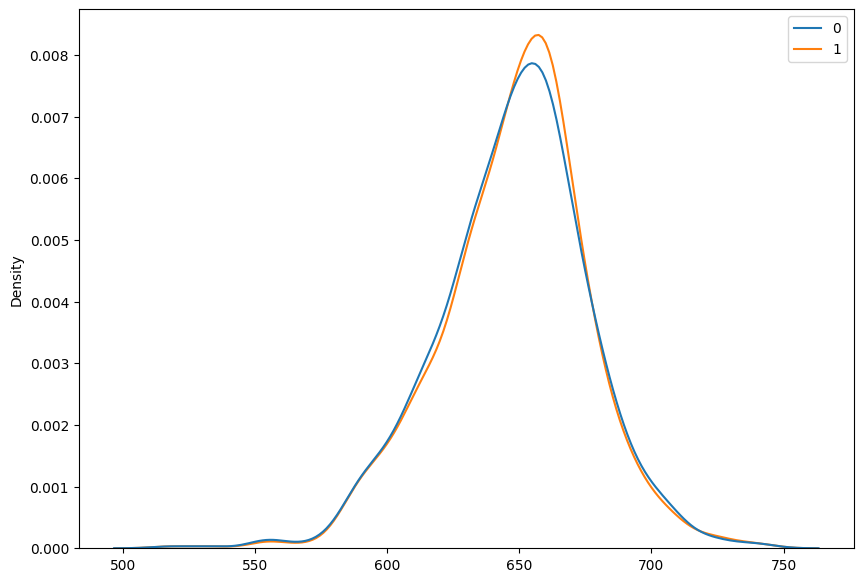

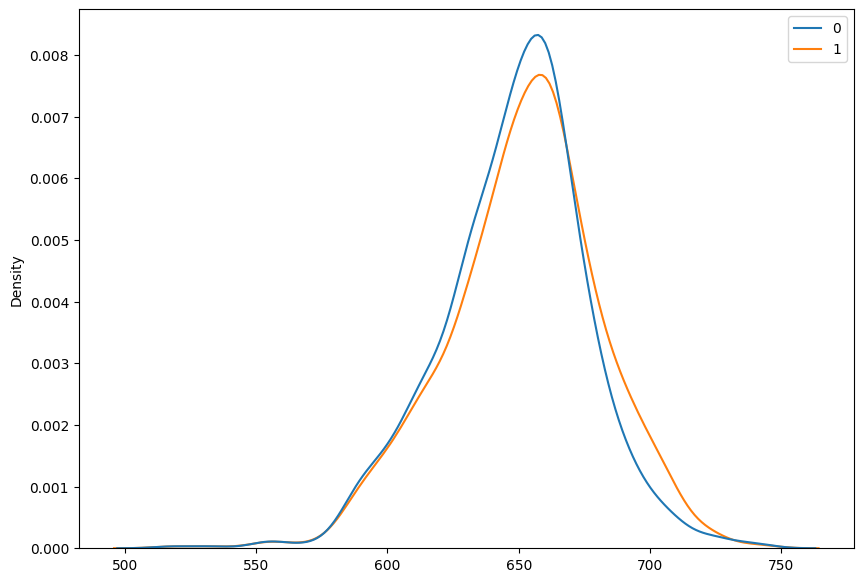

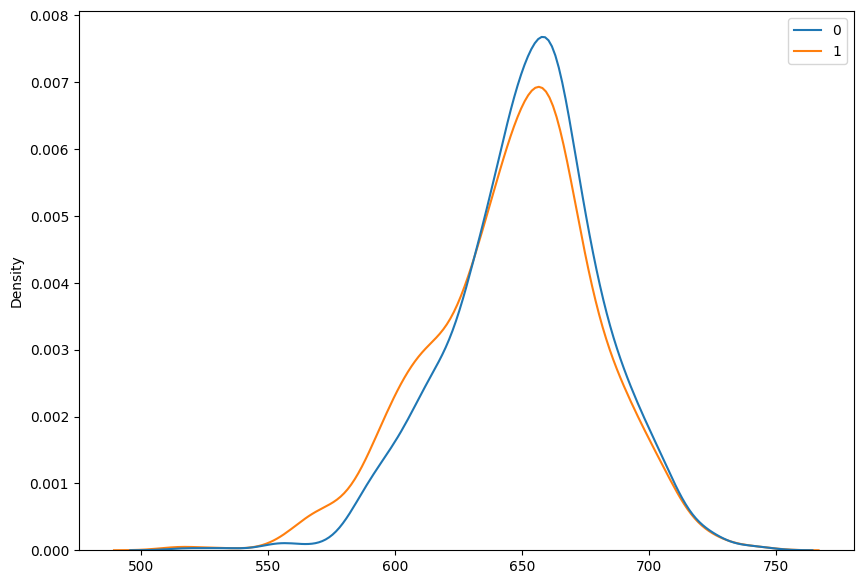

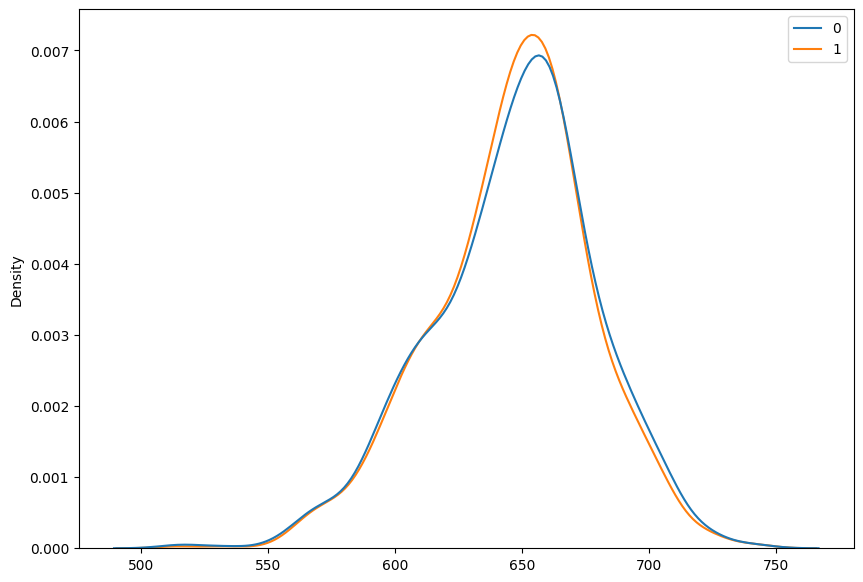

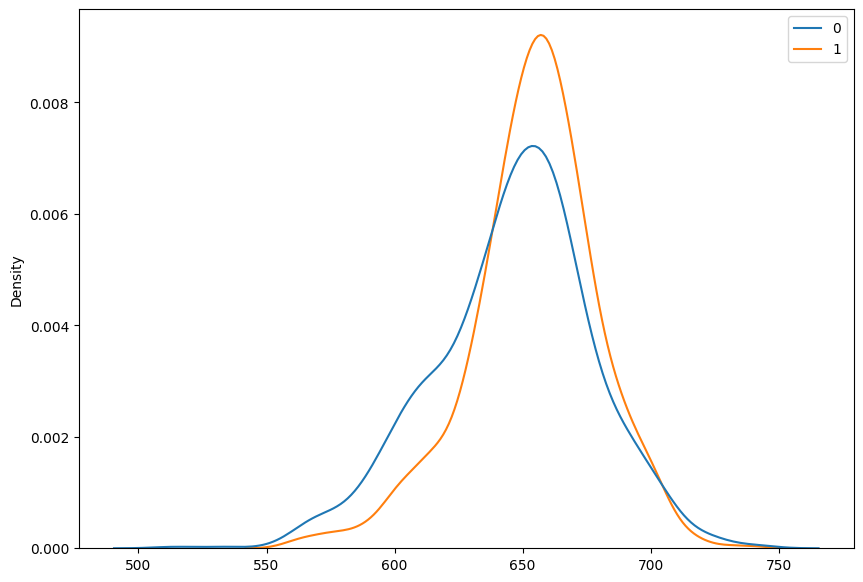

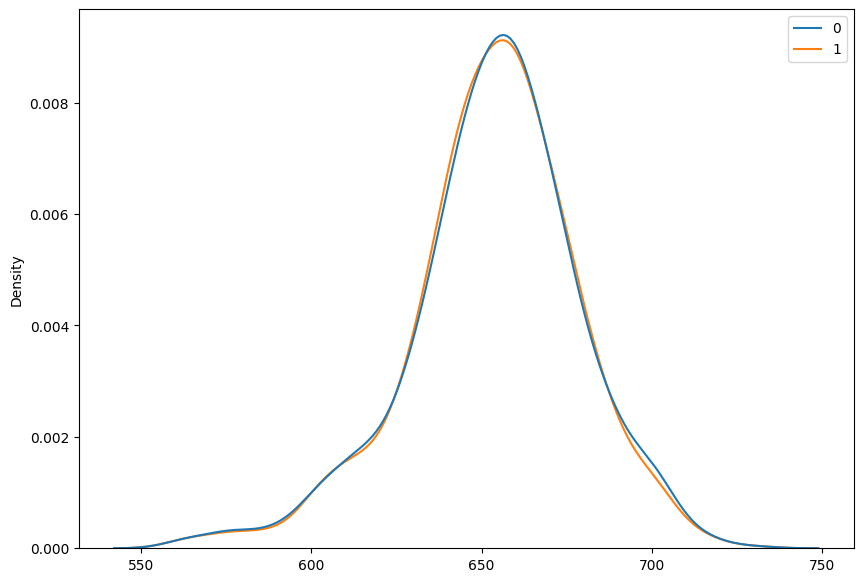

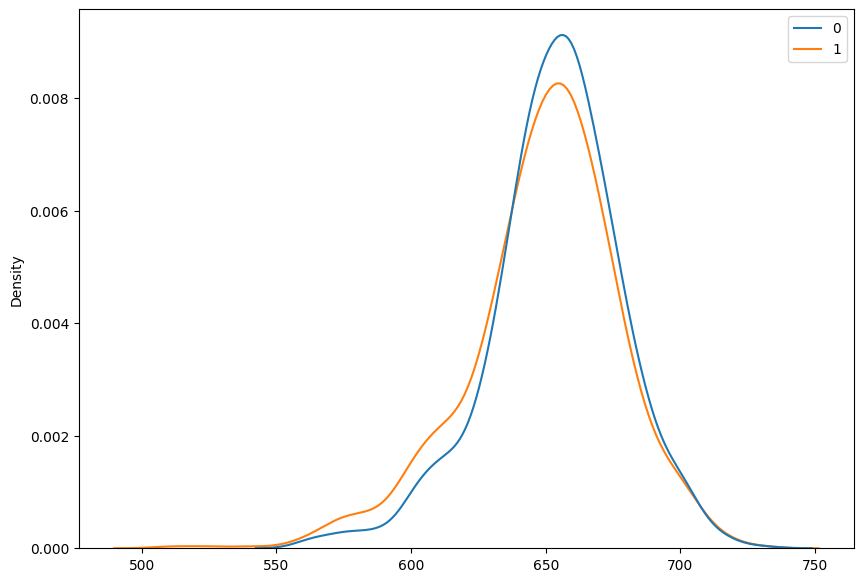

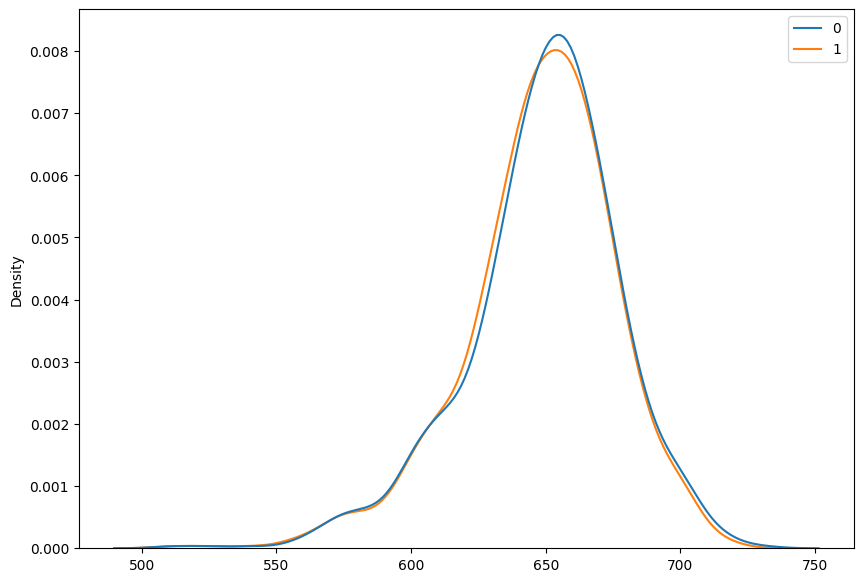

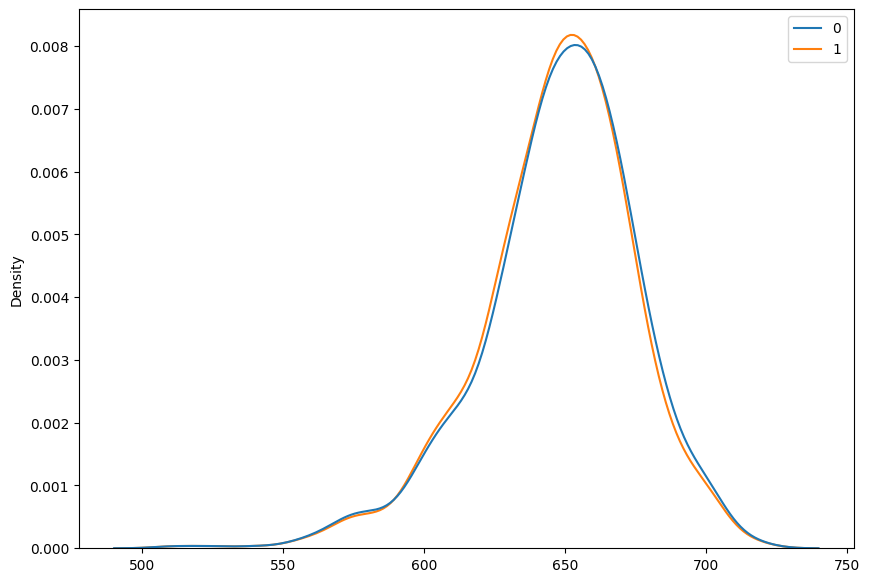

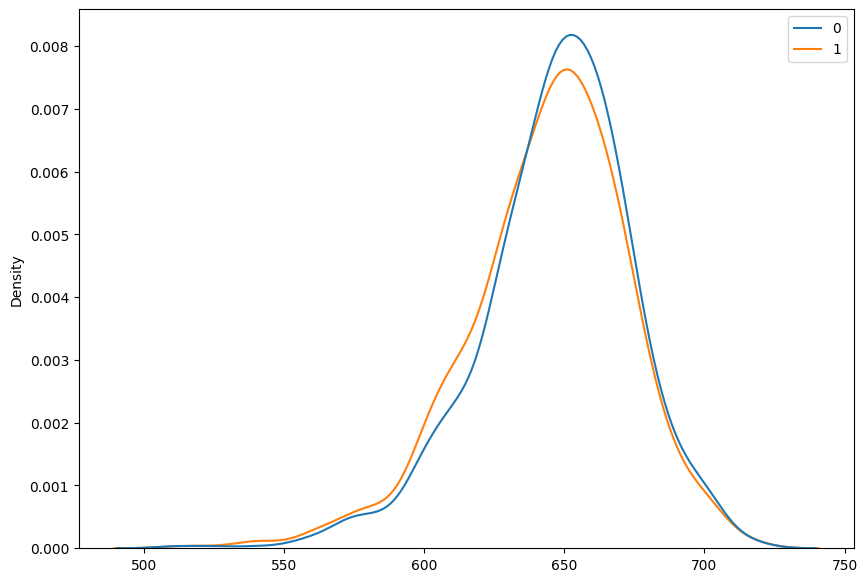

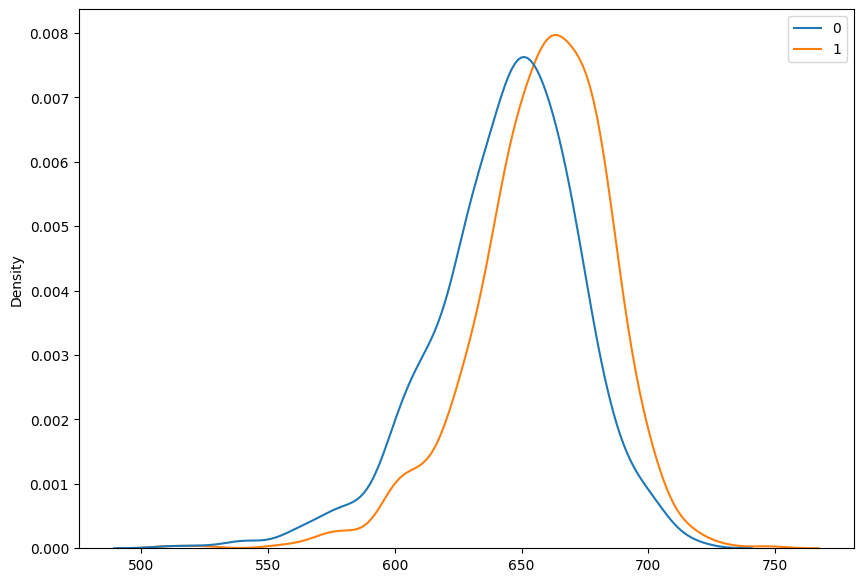

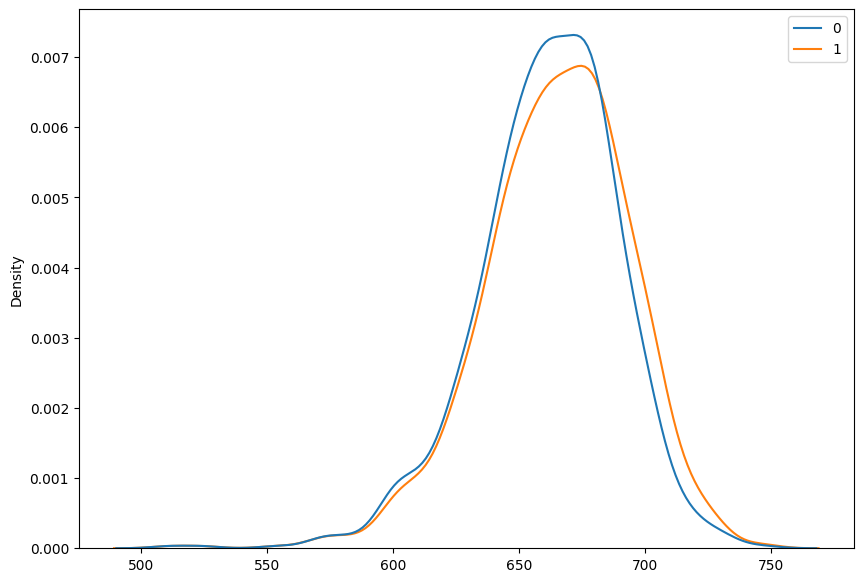

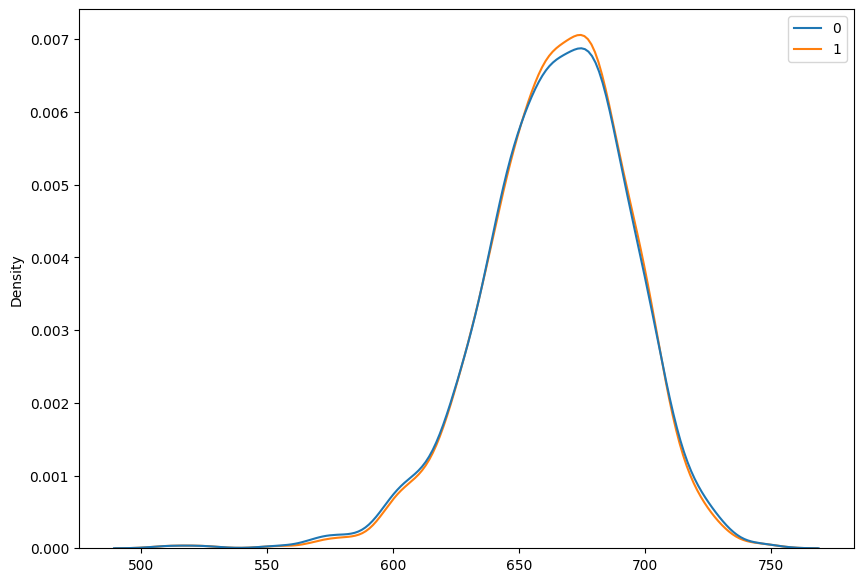

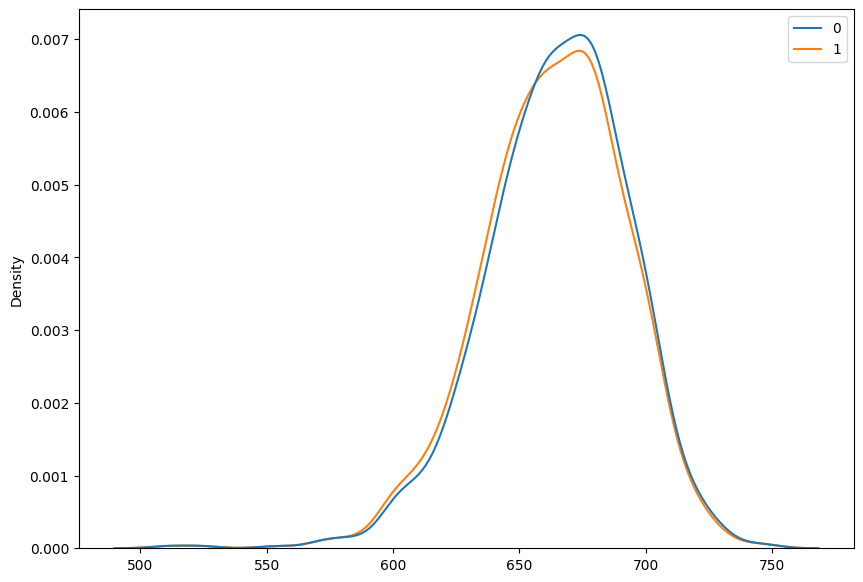

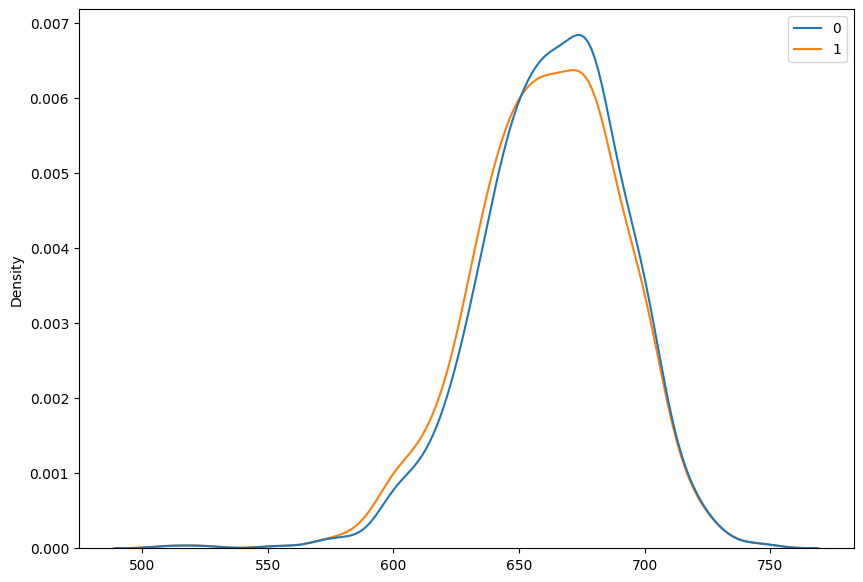

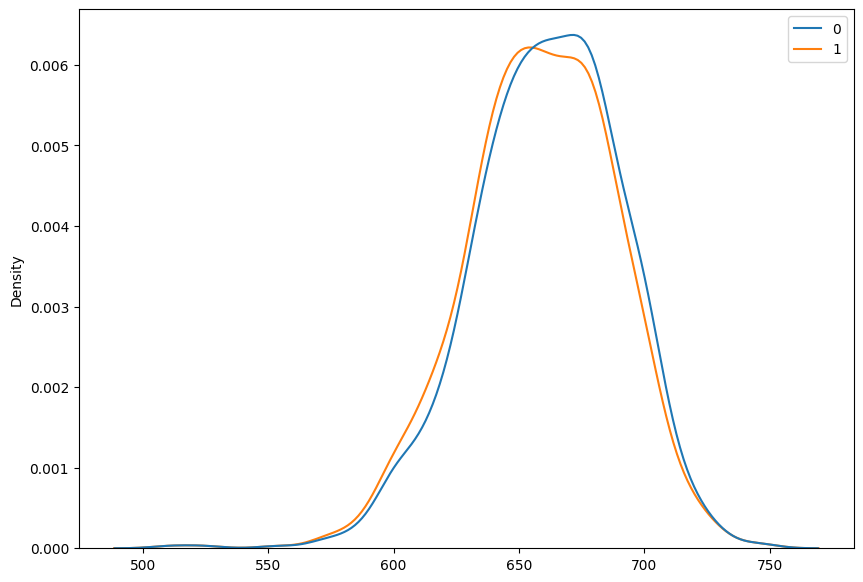

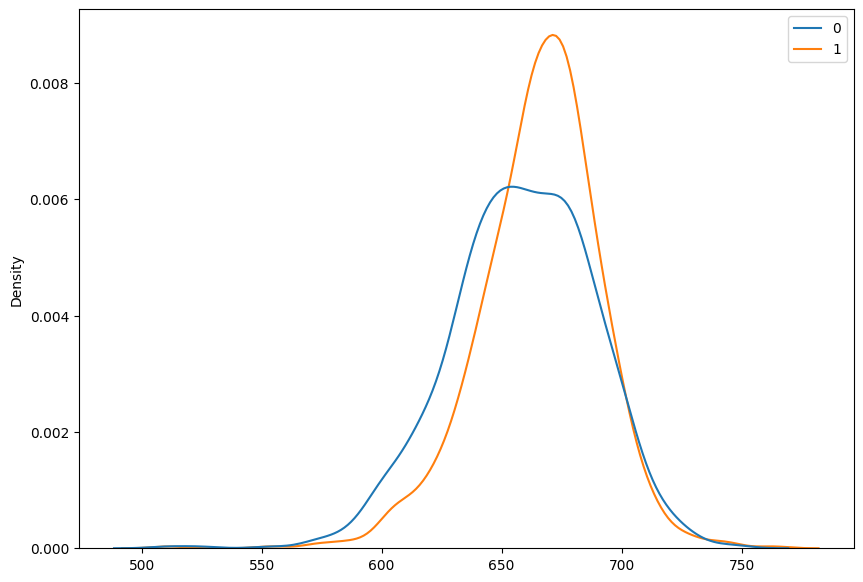

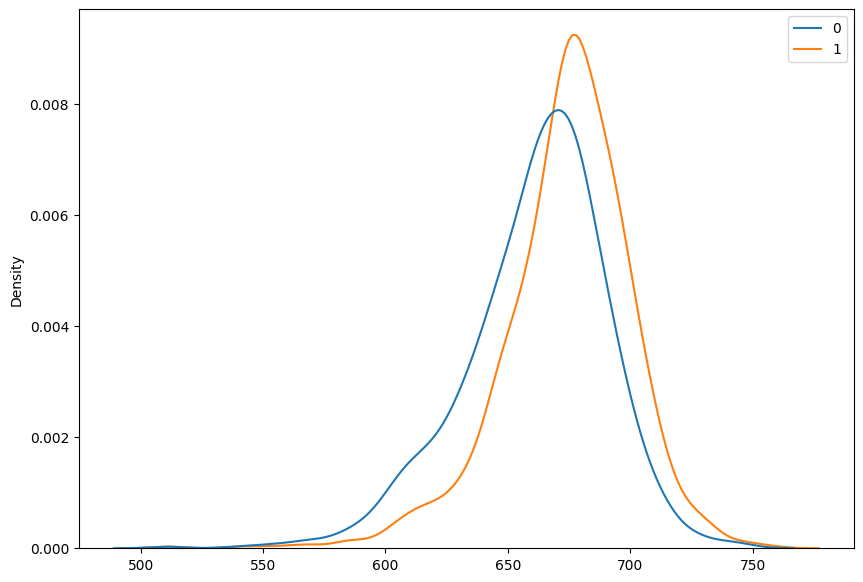

In [6]:
for idx, i in enumerate(index_0):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i], X[i + 1]])

    print(idx, y[i])

    value, is_drift = ks(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = js(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = kl_div(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = psi(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = wd(X[i], X[i + 1])
    print(value, is_drift, "\n")

0 1
0.9999962022688547 False
0.024373627790097392 False
0.006911296566005718 False
0.008910424802443088 False
0.020514594258143216 False 

1 1
0.029225323426275904 True
0.06754927508156128 False
0.017071145994462012 False
0.03710552998897455 False
0.13696368331919972 True 

2 1
0.025633868930359294 True
0.078083554006174 False
0.026655806455670276 False
0.05823061513452485 False
0.17247839455388142 True 



IndexError: index 30 is out of bounds for axis 0 with size 30

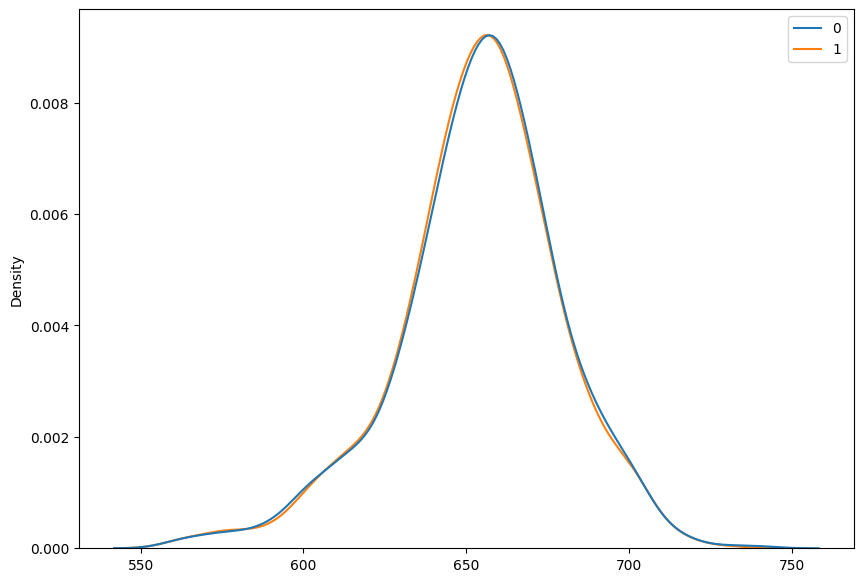

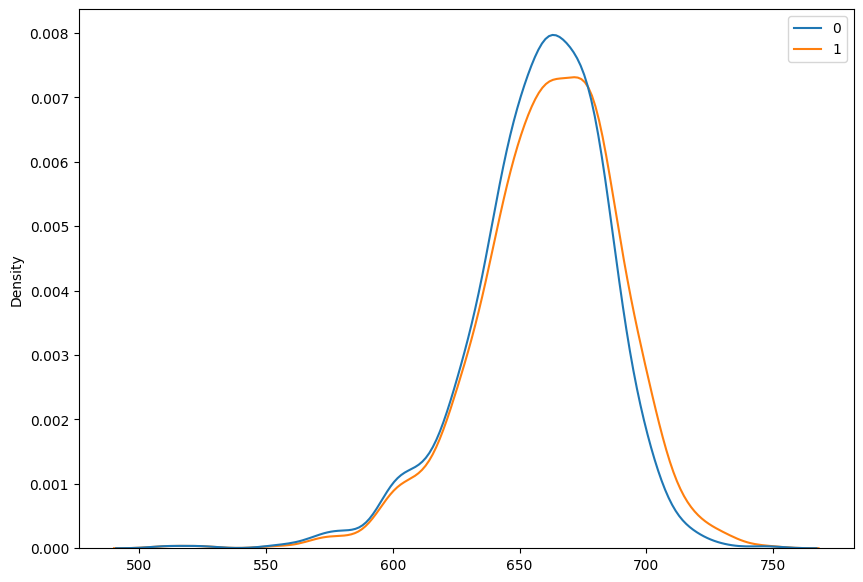

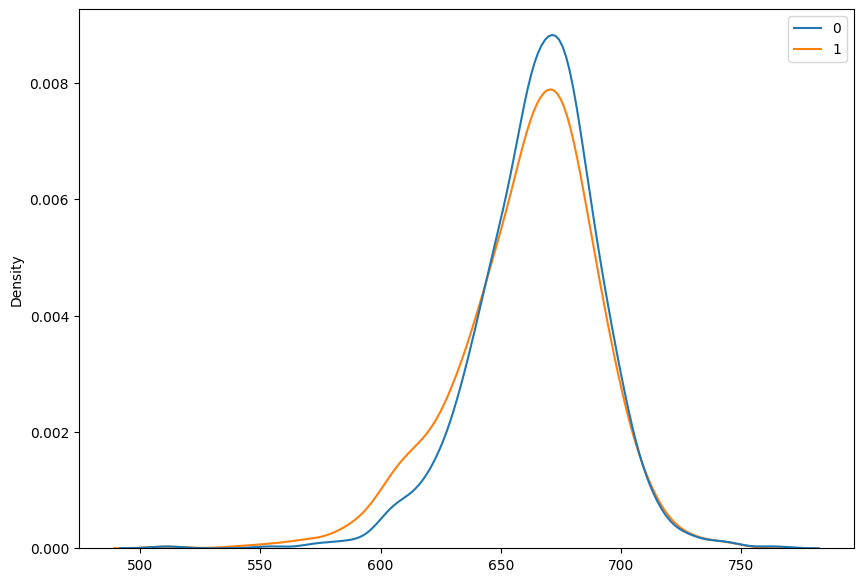

<Figure size 1000x700 with 0 Axes>

In [7]:
for idx, i in enumerate(index_1):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i], X[i + 1]])

    print(idx, y[i])

    value, is_drift = ks(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = js(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = kl_div(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = psi(X[i], X[i + 1])
    print(value, is_drift)

    value, is_drift = wd(X[i], X[i + 1])
    print(value, is_drift, "\n")

# Modeling

In [ ]:
data_path = "../data/train/histogram/logistic_60_days_3000_samples_90.npy"
data = np.load(data_path)
data.shape

(60, 551)

In [6]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X, y = data[:, :-1], data[:, -1]

In [ ]:
i =58

print(y[i + 1])

plt.figure(figsize=(10, 7))
sns.histplot([X[i], X[i + 1]])

value, is_drift = js(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = kl_div(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = psi(X[i], X[i + 1])
print(value, is_drift)

value, is_drift = wd(X[i], X[i + 1])
print(value, is_drift)

In [ ]:
with open("../data/train/logistic_30_days_100000_samples.np", "wb") as f:
    np.save(f, data)